In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df

name  rollno  marks  attendance
0     A      21     80          82
1     B      23     63          79
2     C      27     64          75
3     D      25     65          78
4     E      38    130          97
5     F      36     45          65
6     G      47    137          89
7     H      41    156          94
8     I      42     48          70
9     J      35     51          66
10    K      34     49          68
11    L      40    155          94
12    M      37     70          70
13    N      46     90          85
14    O      39     61          62
15    P      48     60          64
16    Q      49    150          95
17    R      44     53          62
18    S      50    160          97
19    T      43    162          98

Text(0, 0.5, 'marks')

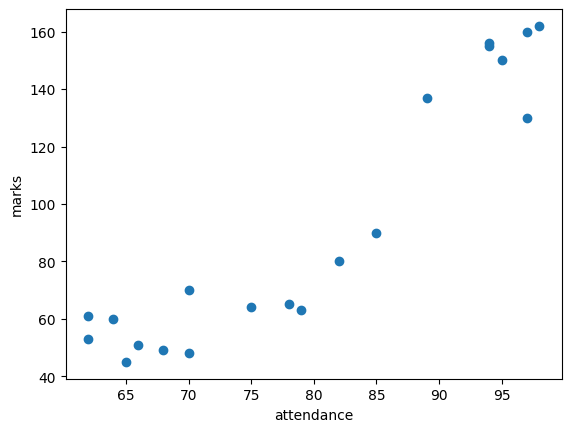

In [3]:
plt.scatter(df['attendance'], df['marks'])
plt.xlabel('attendance')
plt.ylabel('marks')

Now we will use Kmeans method and mention n_clusters equal to 3. After that we use fit_predict method to predict which sample will be assigned to which cluster. Here cluster 1 is '0', cluster 2 is '1', and cluster 3 is '2'

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

we will fit and predict

In [5]:
y_pred = km.fit_predict(df[['attendance', 'marks']])
y_pred

array([0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1])

Now we will add these predictions to our original dataset

In [6]:
df['cluster']=y_pred
df

name  rollno  marks  attendance  cluster
0     A      21     80          82        0
1     B      23     63          79        0
2     C      27     64          75        0
3     D      25     65          78        0
4     E      38    130          97        1
5     F      36     45          65        2
6     G      47    137          89        1
7     H      41    156          94        1
8     I      42     48          70        2
9     J      35     51          66        2
10    K      34     49          68        2
11    L      40    155          94        1
12    M      37     70          70        0
13    N      46     90          85        0
14    O      39     61          62        2
15    P      48     60          64        2
16    Q      49    150          95        1
17    R      44     53          62        2
18    S      50    160          97        1
19    T      43    162          98        1

We can split the main data frame into 3 data frames based on cluster(0,1 and 2). 1 data point which should belong to cluster blue is actually coloured green

Text(0, 0.5, 'marks')

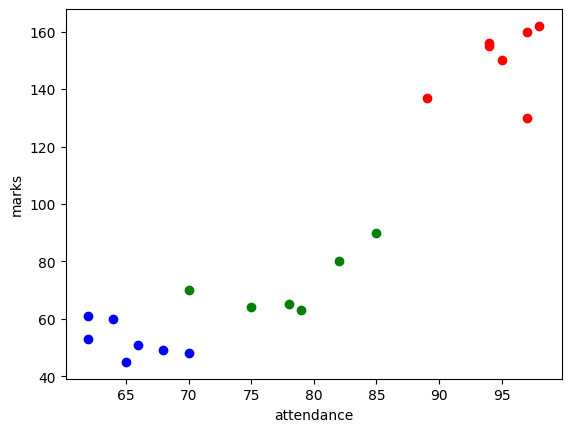

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.attendance, df1['marks'], color='green')
plt.scatter(df2.attendance, df2['marks'], color='red')
plt.scatter(df3.attendance, df3['marks'], color='blue')
plt.xlabel('attendance')
plt.ylabel('marks')

The sample points got added into a wrong group because our data is not properly scaled, so now we need to scale our data using normalization. For that we need the help of MinMaxscaler to scale our data in range of 0 and 1. After that we again try to take the predictions using Kmeans and fit_predict methods as we did previously on unscaled data.

In [8]:
scale = MinMaxScaler()

scale.fit(df[['marks']])
df['marks'] = scale.transform(df[['marks']])

scale.fit(df[['attendance']])
df['attendance'] = scale.transform(df[['attendance']])

In [9]:
df.head()

name  rollno     marks  attendance  cluster
0    A      21  0.299145    0.555556        0
1    B      23  0.153846    0.472222        0
2    C      27  0.162393    0.361111        0
3    D      25  0.170940    0.444444        0
4    E      38  0.726496    0.972222        1

In [10]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['attendance', 'marks']])
y_pred

array([1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0])

We will now delete or drop the previously added cluster column and add a new one with updated predictions(with scaled data) to our dataset. Now when we try to plot the clusters, we can observe that each sample point of our dataset is clustered correctly

In [11]:
df = df.drop(['cluster'], axis='columns')
df

name  rollno     marks  attendance
0     A      21  0.299145    0.555556
1     B      23  0.153846    0.472222
2     C      27  0.162393    0.361111
3     D      25  0.170940    0.444444
4     E      38  0.726496    0.972222
5     F      36  0.000000    0.083333
6     G      47  0.786325    0.750000
7     H      41  0.948718    0.888889
8     I      42  0.025641    0.222222
9     J      35  0.051282    0.111111
10    K      34  0.034188    0.166667
11    L      40  0.940171    0.888889
12    M      37  0.213675    0.222222
13    N      46  0.384615    0.638889
14    O      39  0.136752    0.000000
15    P      48  0.128205    0.055556
16    Q      49  0.897436    0.916667
17    R      44  0.068376    0.000000
18    S      50  0.982906    0.972222
19    T      43  1.000000    1.000000

In [12]:
df['cluster']=y_pred
df

name  rollno     marks  attendance  cluster
0     A      21  0.299145    0.555556        1
1     B      23  0.153846    0.472222        1
2     C      27  0.162393    0.361111        1
3     D      25  0.170940    0.444444        1
4     E      38  0.726496    0.972222        0
5     F      36  0.000000    0.083333        2
6     G      47  0.786325    0.750000        0
7     H      41  0.948718    0.888889        0
8     I      42  0.025641    0.222222        2
9     J      35  0.051282    0.111111        2
10    K      34  0.034188    0.166667        2
11    L      40  0.940171    0.888889        0
12    M      37  0.213675    0.222222        2
13    N      46  0.384615    0.638889        1
14    O      39  0.136752    0.000000        2
15    P      48  0.128205    0.055556        2
16    Q      49  0.897436    0.916667        0
17    R      44  0.068376    0.000000        2
18    S      50  0.982906    0.972222        0
19    T      43  1.000000    1.000000        0

Text(0, 0.5, 'marks')

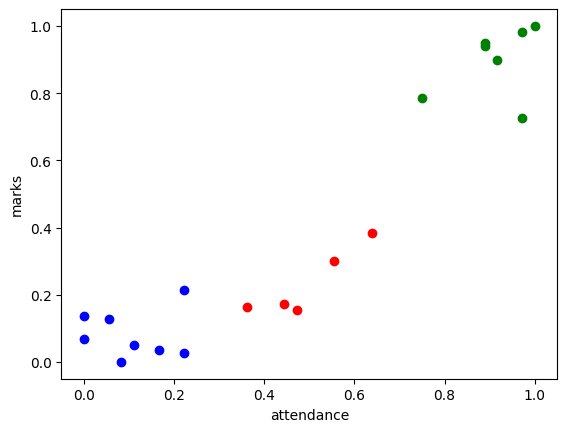

In [13]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.attendance, df1['marks'], color='green')
plt.scatter(df2.attendance, df2['marks'], color='red')
plt.scatter(df3.attendance, df3['marks'], color='blue')
plt.xlabel('attendance')
plt.ylabel('marks')

We can also generate the centroids of our clusters by using cluster_centers_

The 'cluster center' is the arithmetic mean of all the points belonging to the cluster

In [14]:
km.cluster_centers_

array([[0.91269841, 0.8974359 ],
       [0.49444444, 0.23418803],
       [0.10763889, 0.08226496]])

Text(0, 0.5, 'marks')

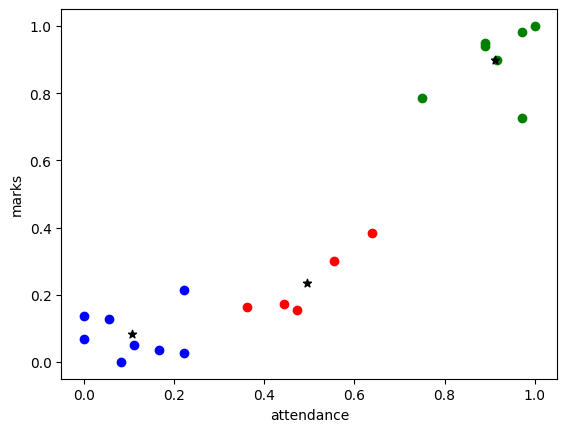

In [15]:
plt.scatter(df1.attendance, df1['marks'], color='green')
plt.scatter(df2.attendance, df2['marks'], color='red')
plt.scatter(df3.attendance, df3['marks'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*')
plt.xlabel('attendance')
plt.ylabel('marks')

Elbow plot

In [16]:
sse = []
k_range = range(1,5)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['attendance', 'marks']])
    sse.append(km.inertia_)

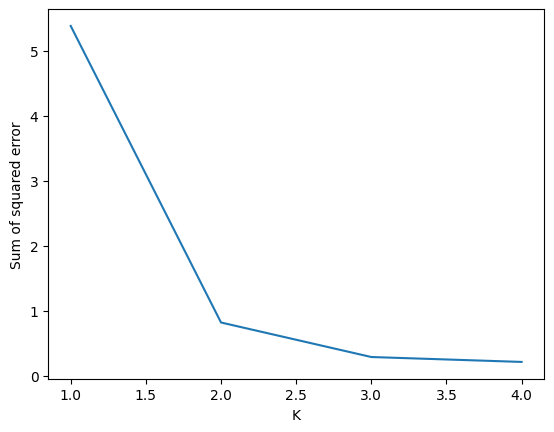

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

In [18]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [20]:
import sys
print(sys.executable)
print(sys.version)

C:\Users\ironicinno\.conda\envs\myenv\python.exe
3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]


In [21]:
import sklearn
print(sklearn.__version__)

1.0.2


In [22]:
import pandas
print(pandas.__version__)

1.3.5
